# Graf przedstawiający powiązania między niektórymi postaciam z serii "Harry Potter"

Dane wziete z: https://github.com/efekarakus/potter-network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Wczytywanie danych
characters = pd.read_csv('characters.csv')

relations = pd.read_csv('relations.csv')

In [3]:
characters.head()

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [4]:
relations.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [5]:
# Tworzenie grafu
G = nx.Graph()

# Dodawanie wierzchołków
for _, row in characters.iterrows():
    G.add_node(row['id'], name=row['name'], bio=row['bio'])

# Dodawanie krawędzi z zastrzeżeniem że graf ma nie zawierać pętli
for _, row in relations.iterrows():
    if row['source'] != row['target']:
        G.add_edge(row['source'], row['target'], type=row['type'])

In [6]:
# Zdefiniowanie typów krawędzi
positive_edges = [(u, v) for u, v, d in G.edges(data=True) if d['type'] == '+']
negative_edges = [(u, v) for u, v, d in G.edges(data=True) if d['type'] == '-']

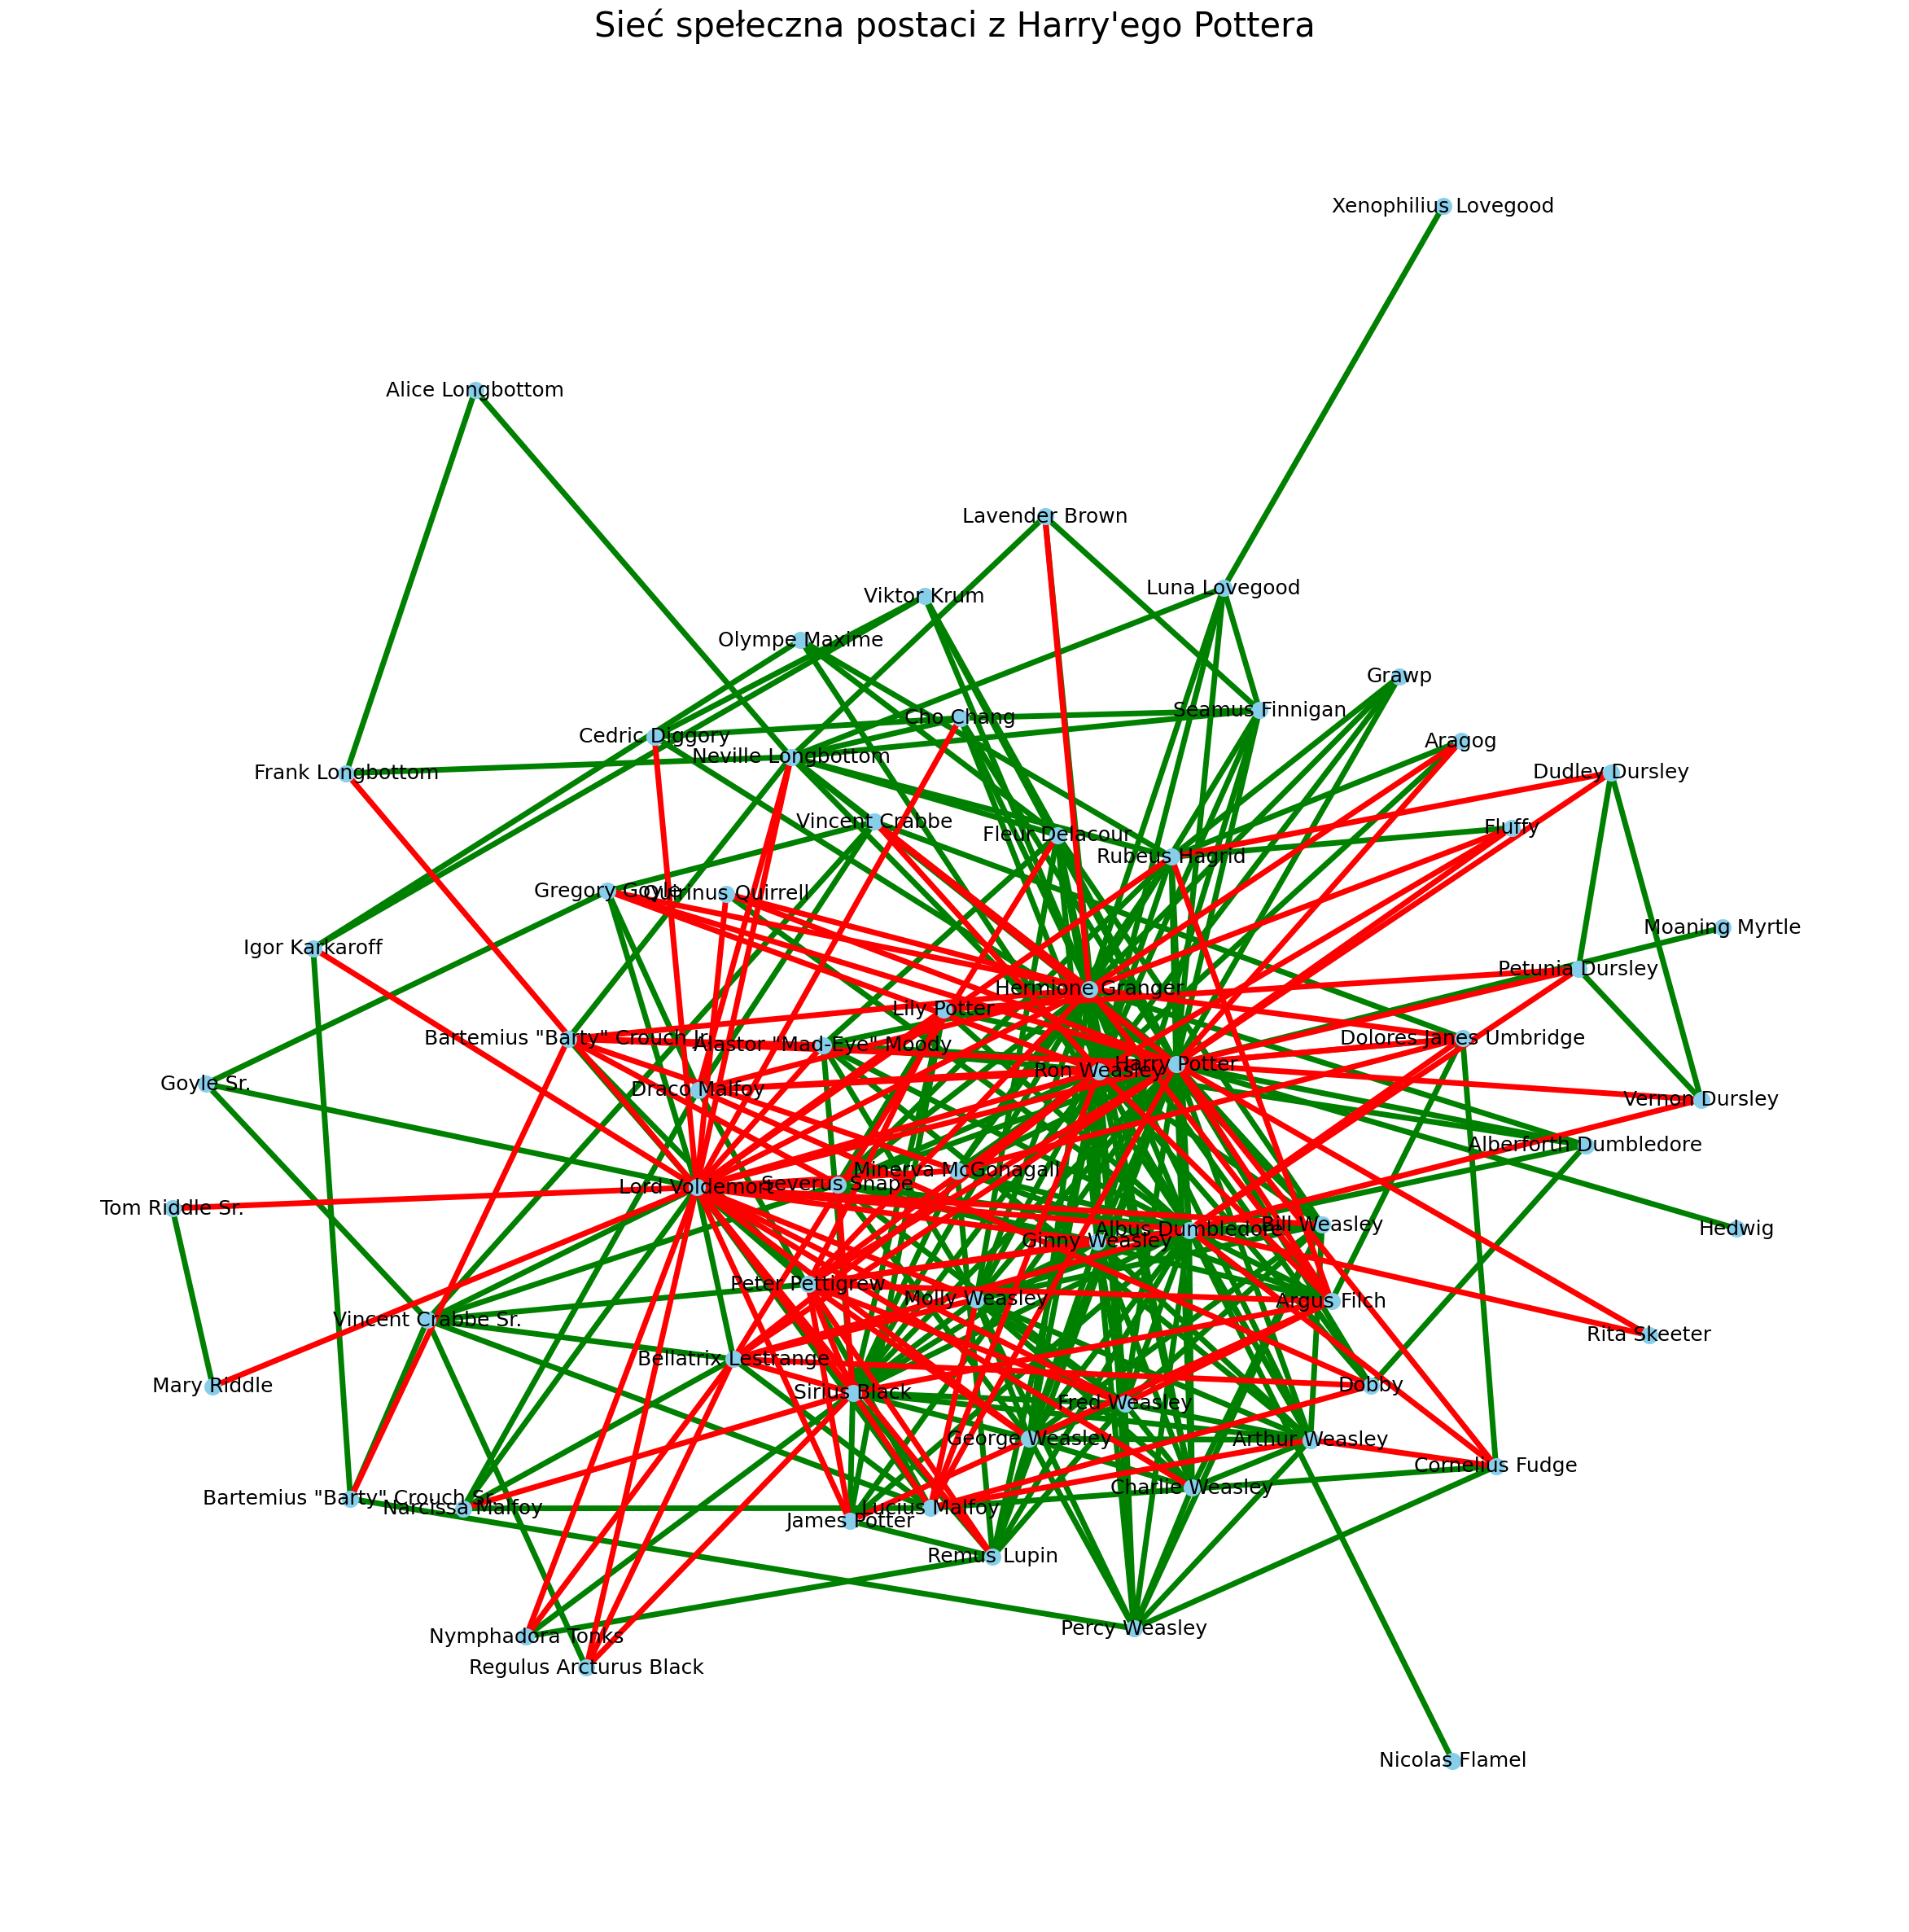

In [7]:
# Tworzenie garfu (ustawienie rozmiaru i tytułu)
plt.figure(figsize=(30, 30))
plt.title("Sieć spełeczna postaci z Harry'ego Pottera", fontsize=30)
plt.axis('off')

# Generowanie pozycji dla wierzchołków z użyciem Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Rysowanie wierzchołków i krawędzi
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=200)
nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='green', width=5)
nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='red', width=5)

# Dodanie podpisów dla wierzchołków
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'name'), font_size=18)

plt.show()

### Redukcja ilości postaci



Ze względu na dużą ilość postaci wykres jest mało czytelny dlatego zredukujemy ich liczbę.

In [8]:
import numpy as np

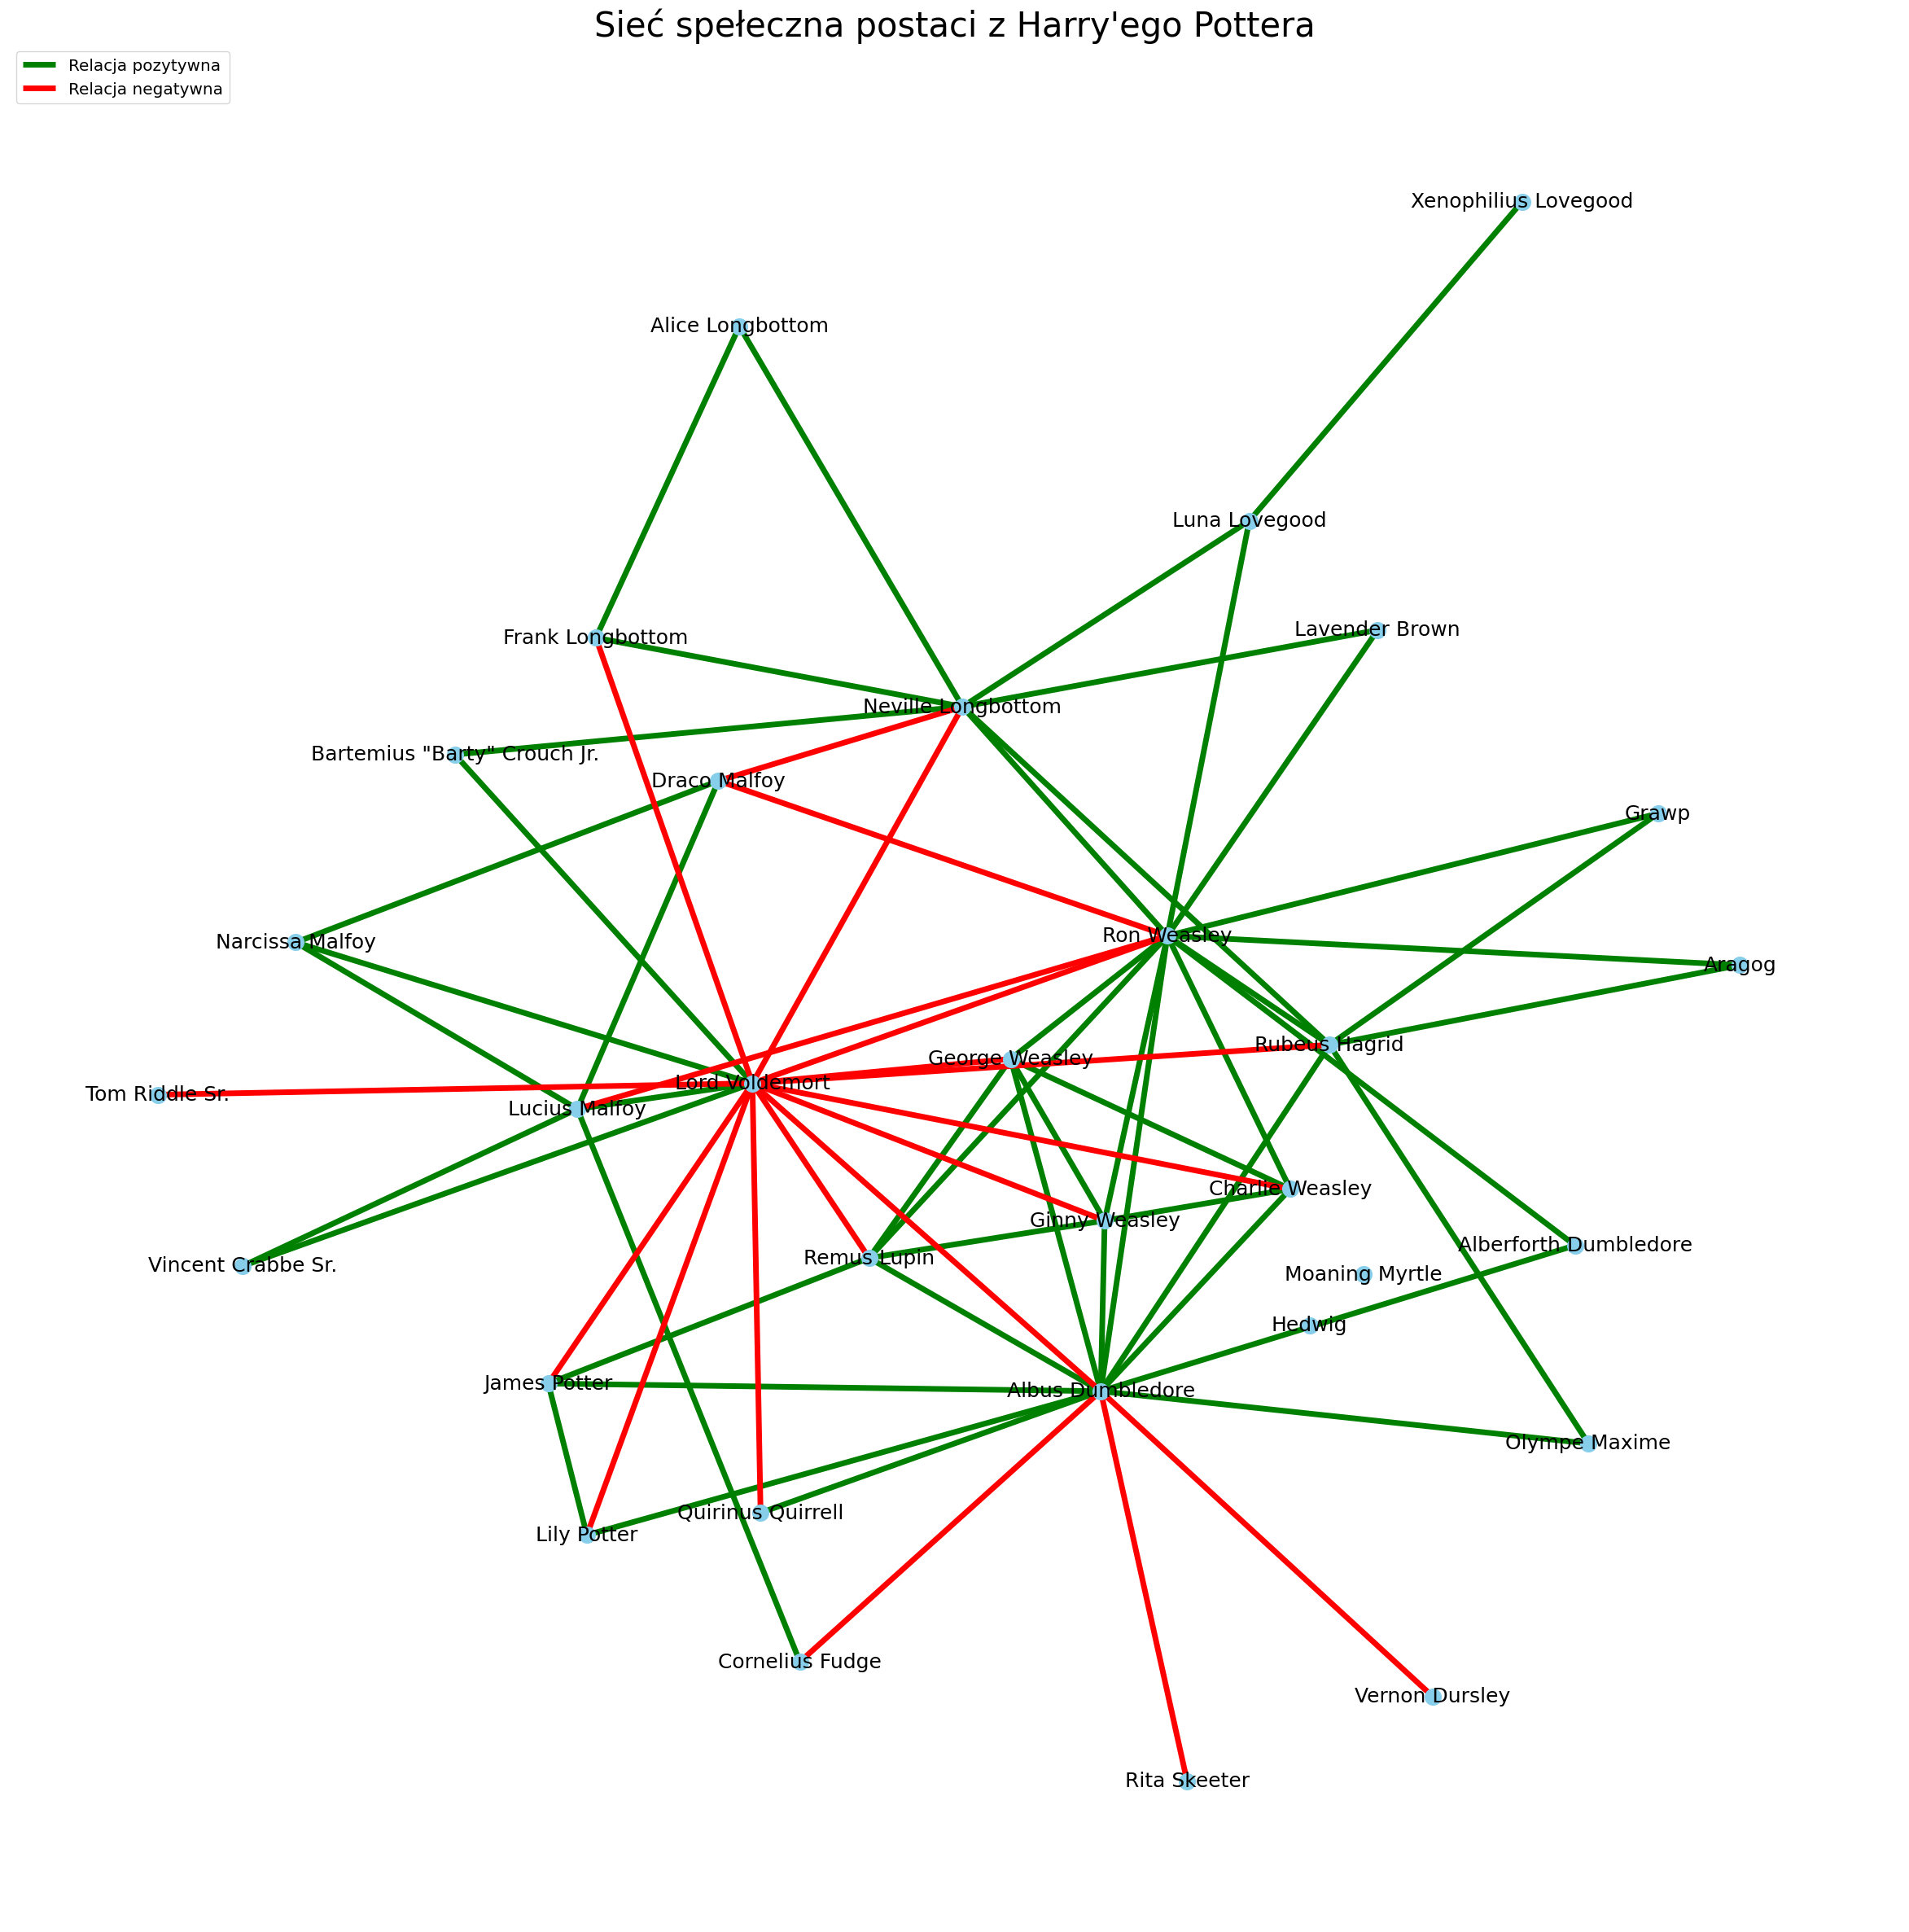

In [9]:
# Wyliczamy ilość postaci do zachowania (50% oryginalnych danych)
num_characters_to_keep = int(0.5 * len(G.nodes()))

np.random.seed(0)

# Losowo wybieramy 50% oryginalnych danych
reduced_nodes = set(np.random.choice(G.nodes(), size=num_characters_to_keep, replace=False))

# Tworzymy nowy graf z ograniczoną liczbą postaci
G_reduced = nx.Graph(G.subgraph(reduced_nodes))

# Powtarzamy działania wykonywane przy tworzeniu pierwszej wersji grafu, ale tym razem dla jego zredukowanej wersji
pos_reduced = nx.kamada_kawai_layout(G_reduced)

positive_edges_reduced = [(u, v) for u, v, d in G_reduced.edges(data=True) if d['type'] == '+']
negative_edges_reduced = [(u, v) for u, v, d in G_reduced.edges(data=True) if d['type'] == '-']

plt.figure(figsize=(30, 30))
plt.title("Sieć spełeczna postaci z Harry'ego Pottera", fontsize=30)
plt.axis('off')

nx.draw_networkx_nodes(G_reduced, pos_reduced, node_color='skyblue', node_size=200)
nx.draw_networkx_edges(G_reduced, pos_reduced, edgelist=positive_edges_reduced, edge_color='green', width=5, label='Relacja pozytywna')
nx.draw_networkx_edges(G_reduced, pos_reduced, edgelist=negative_edges_reduced, edge_color='red', width=5, label='Relacja negatywna')

nx.draw_networkx_labels(G_reduced, pos_reduced, labels=nx.get_node_attributes(G_reduced, 'name'), font_size=18)

# Dodajemy do grafu legendę
plt.legend(loc='upper left', fontsize='x-large')

plt.show()